### Задача #3 - Python ML
Постройте модель по оценке вероятности оттока на основе данных ***telecom_churn.csv*** (задача классификации - 2 класса). Оцените качество полученной модели.

## 1. Загрузка данных и предобработка датасета.

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from numpy.random import RandomState
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from numpy.random import RandomState
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [145]:
# загружаем данные

raw = pd.read_csv("telecom_churn.csv") 
raw

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [146]:
# посмотрим на признаки и их тип

raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

Вывод: данные имеют разный тип. Столбцов с пропущенными значениями не наблюдается.

In [147]:
# для удобства создадим новый датасет в котором заменим значения False и True на 0 и 1

raw2=raw # новый датасет
raw2['churn'] = [0 if x==False else 1 for x in raw2['churn']] # замена значений False и True на 0 и 1
raw2

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [148]:
raw2.churn.sum()

483

In [149]:
# посмотрим на распределение целевой метки

raw2.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

Вывод: наблюдается сильный дисбаланс классов. Модель может испытывать проблемы с порогом точности/полноты. При подборе гиперпараметров надо учесть баланс классов.

In [150]:
### создадим списки с категориальными и вещественными признаками для дальнейшего анализа
raw3= raw2.drop(['churn'], axis=1)
num_cols = raw3.dtypes[raw.dtypes != 'object'].index
cat_cols = raw3.dtypes[raw.dtypes == 'object'].index

In [151]:
# вывод числовых признаков
num_cols

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

In [152]:
# вывод категориальных признаков
cat_cols

Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')

### Выводы по п.1.

1. датасет состоит как из числовых, так и из категориальных признаков. Пропущенных значений в признаках нет.
2. Распределение целевой метки не сбалансировано.

## 2. Анализ взаимосвязи признаков и целевой метрики

Посмотрим на кореляцию числовых признаков между собой

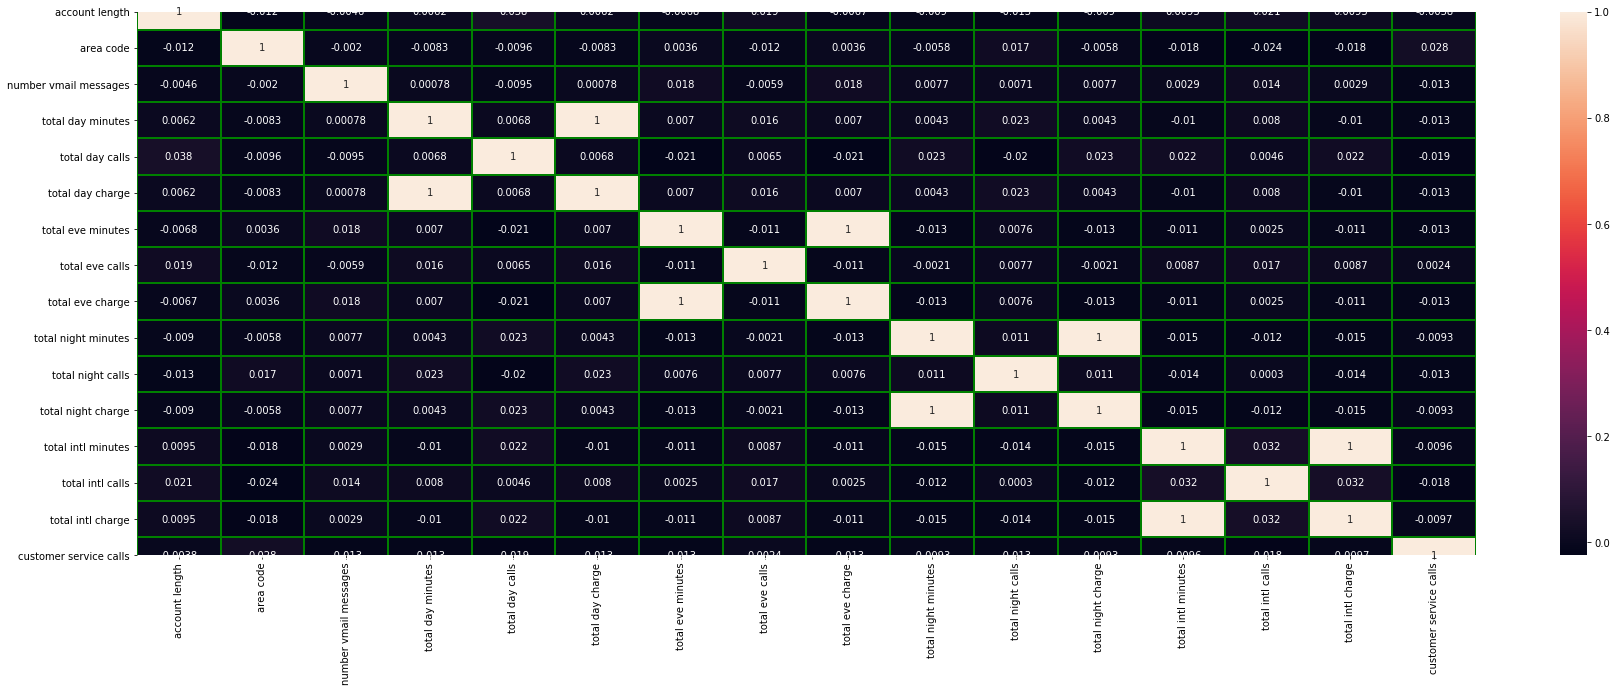

In [153]:
fig = plt.figure(figsize=(30,10))
sns.heatmap(raw2[num_cols].corr(), linewidths=1, linecolor='g', annot=True)

In [154]:
#корреляция признаков и целевой метки
raw3.corrwith(raw2['churn'])

account length            0.016541
area code                 0.006174
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
dtype: float64

Вывод: в целом, числовые признаки сильно не коррелируют между собой. Но есть признаки корреляция между которыми = 1

Такие признаки:
1.total day minute и total day charge
2.total eve charge и total eve minutes
3.total night minutes и total night charge
4.total intl minutes и total intl charge

Данные признаки очень похожи по своей сущности.
Во всех случаях наблюдается взаимосвязь между количеством минут и оплатой разных типов звонков (звонки за день, звонки накануне, международные звонки, ночный звонки), что в принципе логично.

Посмотрим детальнее на категориальные признаки

In [155]:
# посмотрим на количество категорий внутри каждого категориального признака 

for column in raw2[cat_cols].columns:
    print(raw2[column].value_counts(dropna=False))

WV    106
MN     84
NY     83
AL     80
WI     78
OR     78
OH     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
UT     72
TX     72
IN     71
MD     70
KS     70
MT     68
NC     68
NJ     68
CO     66
WA     66
NV     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
ME     62
ND     62
NM     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
337-3932    1
372-4835    1
374-5301    1
356-4706    1
392-5941    1
           ..
361-9923    1
357-3187    1
328-6011    1
365-6022    1
397-6255    1
Name: phone number, Length: 3333, dtype: int64
no     3010
yes     323
Name: international plan, dtype: int64
no     2411
yes     922
Name: voice mail plan, dtype: int64


Вывод:
    
В категориальных признаках у нас представлены: штат, номер телефона, наличие номера телефона, наличие международных звонков.
В принципе, дополнительной обработки категориальные признаки нетребуют.

### Выводы по п.2

Датасет состоит из числовых и категориальных признаков. На данном этапе признаки не требуют дополнительных преобразований

## 3. Разделение выборки. Построение baseline моделей.

Итак, у нас задача бинарной классификации с дисбалансом классов.
Попробуем использовать несколько методов без значительного подбора параметров, чтобы определить лучший алгоритм классификации.

- Поскольку у нас дисбаланс классов, то в качестве метрик можно использовать ROC-AUC, также можно смотреть дополнительно надругие метрики
- В качестве стратегии кросс-валидации я бы выбрал stratified shuffle split, поскольку у нас есть сильный дисбаланс классов, а этот метод позволит его нейтрализовать.

Начнем с того, что разделим наши данные на обучающую и тестовую выборку.
Тестовая выборка нужна для контроля качества решения: она не должна использоваться вплоть до контроля качества решения. 
Наличие такой выборки поможет убедиться, что в процессе моделирования не было допущено ошибок, не произошло переобучение.

In [111]:
data = raw3 # признаки без целевых меток
labels = raw2['churn'] # отдельно целевые метки

In [112]:
# делим выборку на обучающую и тестовую в размере 80 на 20

from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels = train_test_split(data,labels,test_size=0.2)

Подберем какие-нибудь baseline алгоритмы, чтобы понять, какой алгоритм работает лучше на данном датасете.
Можно использовать: 

1. Логистическая регрессия (например, реализация linear_model.Logistic_Regression)    
2. Случайный лес (например, реализация sklearn.ensemble.RandomForestClassifier)
3. Градиентный бустинг (например, реализация sklearn.ensemble.GradientBoostingClassifier)


In [160]:
# библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from numpy.random import RandomState
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Сделаем Pipeline для небольшой обработки категориальных и числовых признаков для наших baseline моделей.

Чтобы нормализовать линейные признаки будем использовать StandardScaler 
Для кодировки категориальных признаков воспользуемся OneHotEncoder

In [156]:
#категориальные признаки
cat_pipe_lin = Pipeline([('encoding', OneHotEncoder(handle_unknown='ignore'))])

# числовые признаки
num_pipe_lin = Pipeline([('scaler', StandardScaler())])

#собираем в цепочку преобразований
transformer_lin = [('cat', cat_pipe_lin, cat_cols), ('num', num_pipe_lin, num_cols)]
transformer = ColumnTransformer(transformers=transformer_lin)

#### 1. Логистическая  регрессия

In [161]:
# baseline для логистической регрессии

baseline_pipeline_lin = Pipeline([('transofrm', transformer), 
                                  ('estimator', LogisticRegression(random_state=17, max_iter=1000))])

In [167]:
print('Значение метрик качества:')

print('Значение метрики ROC-AUC score для модели логистической регрессии: ', cross_val_score(baseline_pipeline_lin, data, np.ravel(labels),
                                                              scoring='roc_auc',
                                                              cv=StratifiedShuffleSplit(n_splits=5, random_state=17)).mean())

print('Значение метрики balanced_accuracy score для модели логистической регрессии: ', cross_val_score(baseline_pipeline_lin, data, np.ravel(labels),
                                                              scoring='balanced_accuracy',
                                                              cv=StratifiedShuffleSplit(n_splits=5, random_state=17)).mean())

print('Значение метрики F1 score для модели логистической регрессии: ', cross_val_score(baseline_pipeline_lin, data, np.ravel(labels),
                                                              scoring='f1',
                                                              cv=StratifiedShuffleSplit(n_splits=5, random_state=17)).mean())

Значение метрик качества:
Значение метрики ROC-AUC score для модели логистической регрессии:  0.8350524475524477
Значение метрики balanced_accuracy score для модели логистической регрессии:  0.6019959207459207
Значение метрики F1 score для модели логистической регрессии:  0.3292859437295694


#### 2. Случайный лес

In [169]:
# baseline для слуйчайного леса

baseline_pipeline_rf = Pipeline([('transofrm', transformer), ('estimator', RandomForestClassifier(random_state=17))])

In [170]:
print('Значение метрик качества:')

print('Значение метрики ROC-AUC score для модели логистической регрессии: ', cross_val_score(baseline_pipeline_rf, data, np.ravel(labels),
                                                              scoring='roc_auc',
                                                              cv=StratifiedShuffleSplit(n_splits=5, random_state=17)).mean())

print('Значение метрики balanced_accuracy score для модели логистической регрессии: ', cross_val_score(baseline_pipeline_rf, data, np.ravel(labels),
                                                              scoring='balanced_accuracy',
                                                              cv=StratifiedShuffleSplit(n_splits=5, random_state=17)).mean())

print('Значение метрики F1 score для модели логистической регрессии: ', cross_val_score(baseline_pipeline_rf, data, np.ravel(labels),
                                                              scoring='f1',
                                                              cv=StratifiedShuffleSplit(n_splits=5, random_state=17)).mean())

Значение метрик качества:
Значение метрики ROC-AUC score для модели логистической регрессии:  0.920884324009324
Значение метрики balanced_accuracy score для модели логистической регрессии:  0.710402097902098
Значение метрики F1 score для модели логистической регрессии:  0.5845074551208841


#### 3. Градиентный бустинг

In [171]:
baseline_pipeline_gb = Pipeline([('transofrm', transformer), ('estimator', GradientBoostingClassifier(random_state=17))])

In [172]:
print('Значение метрик качества:')

print('Значение метрики ROC-AUC score для модели логистической регрессии: ', cross_val_score(baseline_pipeline_gb, data, np.ravel(labels),
                                                              scoring='roc_auc',
                                                              cv=StratifiedShuffleSplit(n_splits=5, random_state=17)).mean())

print('Значение метрики balanced_accuracy score для модели логистической регрессии: ', cross_val_score(baseline_pipeline_gb, data, np.ravel(labels),
                                                              scoring='balanced_accuracy',
                                                              cv=StratifiedShuffleSplit(n_splits=5, random_state=17)).mean())

print('Значение метрики F1 score для модели логистической регрессии: ', cross_val_score(baseline_pipeline_gb, data, np.ravel(labels),
                                                              scoring='f1',
                                                              cv=StratifiedShuffleSplit(n_splits=5, random_state=17)).mean())

Значение метрик качества:
Значение метрики ROC-AUC score для модели логистической регрессии:  0.9257939976689975
Значение метрики balanced_accuracy score для модели логистической регрессии:  0.845104895104895
Значение метрики F1 score для модели логистической регрессии:  0.795344202714981


### Выводы по п. 3

Лучше всех среди Baseline алгоритмов показал себя градиетный бустинг. Остановимся именно на этом алгоритме и попробуем подобрать лучие гиперпараметры.

## 4. Подбор лучший модели и тюнинг ее гиперпараметров.

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit, train_test_split
from sklearn.model_selection import train_test_split, cross_val_score,  StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool, cv
from numpy.random import RandomState

from category_encoders import OrdinalEncoder, LeaveOneOutEncoder, CatBoostEncoder, TargetEncoder, WOEEncoder, JamesSteinEncoder, OneHotEncoder
import xgboost as xgb
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Часть 1: выбор типа бустинга

Есть несколько видов реализации градиентного бустинга: LGBMClassifier , XGBClassifier, CatBoost. Попробуем подобрать наилучший из этих алгоритмов.

#### 1. XGBClassifier

In [196]:
baseline_pipeline_xgb = Pipeline([('transofrm', transformer), ('estimator',xgb.XGBClassifier(random_state=17, metrics='auc', n_jobs=2))])
print('Значение метрики ROC-AUC score для модели XGBClassifier: ', cross_val_score(baseline_pipeline_xgb, data, np.ravel(labels),
                                                              scoring='roc_auc',
                                                              cv=StratifiedShuffleSplit(n_splits=5, random_state=17)).mean())

[18:52:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { metrics } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:52:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { metrics } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:52:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { metrics } might not be used.

  This may not be accurate due to some parameters are only used in language bindings

Вывод: XGBClassifier показывает значение ROC-AUC выше, чем GradientBoostingClassifier, поскольку является его более продвинутой версией.

#### 2. LGBMClassifier

In [200]:
baseline_pipeline_lgbm = Pipeline([('transofrm', transformer), ('estimator',lgb.LGBMClassifier(random_state=17, metrics='auc', n_jobs=2))])
print('Значение метрики ROC-AUC score для модели LGBMClassifier: ', cross_val_score(baseline_pipeline_lgbm, data, np.ravel(labels),
                                                              scoring='roc_auc',
                                                              cv=StratifiedShuffleSplit(n_splits=5, random_state=17)).mean())

Значение метрики ROC-AUC score для модели LGBMClassifier:  0.9309294871794871


Вывод:  LGBMClassifier показывает значение ROC-AUC выше, чем XGBClassifier.

#### 3. CatBoost

CatBoost — библиотека для градиентного бустинга, главным преимуществом которой является то, что она одинаково хорошо работает «из коробки» как с числовыми признаками, так и с категориальными.

In [201]:
baseline_pipeline_ctb = Pipeline([('transofrm', transformer), ('estimator',CatBoostClassifier(
    random_seed=17,
    #ускоряет расчет
    task_type='GPU',
    #ранняя остановка
    early_stopping_rounds=200,
    #считаем целевую метрику
    eval_metric='AUC'))])
print('Значение метрики ROC-AUC score для модели CatBoostClassifier: ', cross_val_score(baseline_pipeline_ctb, data, np.ravel(labels),
                                                              scoring='roc_auc',
                                                              cv=StratifiedShuffleSplit(n_splits=5, random_state=17)).mean())

Learning rate set to 0.031735
0:	learn: 0.8821489	total: 41.9ms	remaining: 41.8s
1:	learn: 0.8950553	total: 82.1ms	remaining: 41s
2:	learn: 0.8897507	total: 122ms	remaining: 40.5s
3:	learn: 0.8927453	total: 165ms	remaining: 41.1s
4:	learn: 0.8945564	total: 206ms	remaining: 41s
5:	learn: 0.8944488	total: 247ms	remaining: 40.9s
6:	learn: 0.9027969	total: 297ms	remaining: 42.2s
7:	learn: 0.9124146	total: 358ms	remaining: 44.4s
8:	learn: 0.9130651	total: 396ms	remaining: 43.7s
9:	learn: 0.9142002	total: 436ms	remaining: 43.2s
10:	learn: 0.9151026	total: 478ms	remaining: 43s
11:	learn: 0.9186087	total: 522ms	remaining: 43s
12:	learn: 0.9198227	total: 563ms	remaining: 42.8s
13:	learn: 0.9210487	total: 608ms	remaining: 42.8s
14:	learn: 0.9211635	total: 649ms	remaining: 42.6s
15:	learn: 0.9212666	total: 690ms	remaining: 42.4s
16:	learn: 0.9221506	total: 736ms	remaining: 42.6s
17:	learn: 0.9223040	total: 780ms	remaining: 42.6s
18:	learn: 0.9227043	total: 826ms	remaining: 42.6s
19:	learn: 0.9223

166:	learn: 0.9589363	total: 6.61s	remaining: 33s
167:	learn: 0.9593918	total: 6.65s	remaining: 32.9s
168:	learn: 0.9595908	total: 6.69s	remaining: 32.9s
169:	learn: 0.9598284	total: 6.72s	remaining: 32.8s
170:	learn: 0.9598741	total: 6.76s	remaining: 32.8s
171:	learn: 0.9603412	total: 6.8s	remaining: 32.8s
172:	learn: 0.9604542	total: 6.84s	remaining: 32.7s
173:	learn: 0.9606228	total: 6.87s	remaining: 32.6s
174:	learn: 0.9610585	total: 6.91s	remaining: 32.6s
175:	learn: 0.9611248	total: 6.95s	remaining: 32.5s
176:	learn: 0.9612746	total: 6.99s	remaining: 32.5s
177:	learn: 0.9613346	total: 7.03s	remaining: 32.5s
178:	learn: 0.9614673	total: 7.06s	remaining: 32.4s
179:	learn: 0.9616601	total: 7.1s	remaining: 32.4s
180:	learn: 0.9617211	total: 7.14s	remaining: 32.3s
181:	learn: 0.9621012	total: 7.18s	remaining: 32.3s
182:	learn: 0.9623343	total: 7.22s	remaining: 32.2s
183:	learn: 0.9624940	total: 7.26s	remaining: 32.2s
184:	learn: 0.9624312	total: 7.3s	remaining: 32.2s
185:	learn: 0.962

329:	learn: 0.9820817	total: 12.9s	remaining: 26.2s
330:	learn: 0.9821059	total: 13s	remaining: 26.2s
331:	learn: 0.9822162	total: 13s	remaining: 26.1s
332:	learn: 0.9822565	total: 13s	remaining: 26.1s
333:	learn: 0.9824879	total: 13.1s	remaining: 26.1s
334:	learn: 0.9824888	total: 13.1s	remaining: 26s
335:	learn: 0.9825829	total: 13.1s	remaining: 26s
336:	learn: 0.9825578	total: 13.2s	remaining: 25.9s
337:	learn: 0.9825954	total: 13.2s	remaining: 25.9s
338:	learn: 0.9826062	total: 13.3s	remaining: 25.8s
339:	learn: 0.9825963	total: 13.3s	remaining: 25.8s
340:	learn: 0.9826268	total: 13.3s	remaining: 25.8s
341:	learn: 0.9826708	total: 13.4s	remaining: 25.7s
342:	learn: 0.9826708	total: 13.4s	remaining: 25.7s
343:	learn: 0.9827138	total: 13.5s	remaining: 25.7s
344:	learn: 0.9827756	total: 13.5s	remaining: 25.6s
345:	learn: 0.9827613	total: 13.5s	remaining: 25.6s
346:	learn: 0.9827613	total: 13.6s	remaining: 25.5s
347:	learn: 0.9831800	total: 13.6s	remaining: 25.5s
348:	learn: 0.9832392	

491:	learn: 0.9912592	total: 19.1s	remaining: 19.7s
492:	learn: 0.9912753	total: 19.1s	remaining: 19.6s
493:	learn: 0.9912986	total: 19.1s	remaining: 19.6s
494:	learn: 0.9913524	total: 19.2s	remaining: 19.6s
495:	learn: 0.9913300	total: 19.2s	remaining: 19.5s
496:	learn: 0.9913291	total: 19.3s	remaining: 19.5s
497:	learn: 0.9914421	total: 19.3s	remaining: 19.5s
498:	learn: 0.9914573	total: 19.3s	remaining: 19.4s
499:	learn: 0.9914941	total: 19.4s	remaining: 19.4s
500:	learn: 0.9915129	total: 19.4s	remaining: 19.3s
501:	learn: 0.9915111	total: 19.4s	remaining: 19.3s
502:	learn: 0.9915586	total: 19.5s	remaining: 19.3s
503:	learn: 0.9915524	total: 19.5s	remaining: 19.2s
504:	learn: 0.9916277	total: 19.6s	remaining: 19.2s
505:	learn: 0.9916331	total: 19.6s	remaining: 19.1s
506:	learn: 0.9916322	total: 19.6s	remaining: 19.1s
507:	learn: 0.9916304	total: 19.7s	remaining: 19s
508:	learn: 0.9917021	total: 19.7s	remaining: 19s
509:	learn: 0.9917012	total: 19.7s	remaining: 19s
510:	learn: 0.9917

651:	learn: 0.9945478	total: 25s	remaining: 13.3s
652:	learn: 0.9945909	total: 25s	remaining: 13.3s
653:	learn: 0.9945909	total: 25.1s	remaining: 13.3s
654:	learn: 0.9945909	total: 25.1s	remaining: 13.2s
655:	learn: 0.9946026	total: 25.1s	remaining: 13.2s
656:	learn: 0.9946017	total: 25.2s	remaining: 13.1s
657:	learn: 0.9946017	total: 25.2s	remaining: 13.1s
658:	learn: 0.9946017	total: 25.2s	remaining: 13.1s
659:	learn: 0.9946070	total: 25.3s	remaining: 13s
660:	learn: 0.9946510	total: 25.3s	remaining: 13s
661:	learn: 0.9946519	total: 25.4s	remaining: 13s
662:	learn: 0.9946519	total: 25.4s	remaining: 12.9s
663:	learn: 0.9946519	total: 25.4s	remaining: 12.9s
664:	learn: 0.9946527	total: 25.5s	remaining: 12.8s
665:	learn: 0.9946527	total: 25.5s	remaining: 12.8s
666:	learn: 0.9946527	total: 25.5s	remaining: 12.8s
667:	learn: 0.9946527	total: 25.6s	remaining: 12.7s
668:	learn: 0.9946545	total: 25.6s	remaining: 12.7s
669:	learn: 0.9946761	total: 25.7s	remaining: 12.6s
670:	learn: 0.9946787	

812:	learn: 0.9956489	total: 30.9s	remaining: 7.1s
813:	learn: 0.9956542	total: 30.9s	remaining: 7.06s
814:	learn: 0.9956542	total: 31s	remaining: 7.03s
815:	learn: 0.9956542	total: 31s	remaining: 6.99s
816:	learn: 0.9956551	total: 31s	remaining: 6.95s
817:	learn: 0.9956551	total: 31.1s	remaining: 6.91s
818:	learn: 0.9956596	total: 31.1s	remaining: 6.87s
819:	learn: 0.9956596	total: 31.1s	remaining: 6.83s
820:	learn: 0.9956587	total: 31.2s	remaining: 6.8s
821:	learn: 0.9956587	total: 31.2s	remaining: 6.76s
822:	learn: 0.9957072	total: 31.3s	remaining: 6.73s
823:	learn: 0.9957072	total: 31.3s	remaining: 6.69s
824:	learn: 0.9957072	total: 31.3s	remaining: 6.65s
825:	learn: 0.9957072	total: 31.4s	remaining: 6.61s
826:	learn: 0.9957072	total: 31.4s	remaining: 6.57s
827:	learn: 0.9957080	total: 31.5s	remaining: 6.53s
828:	learn: 0.9957224	total: 31.5s	remaining: 6.5s
829:	learn: 0.9957242	total: 31.5s	remaining: 6.46s
830:	learn: 0.9957242	total: 31.6s	remaining: 6.42s
831:	learn: 0.9957269

974:	learn: 0.9963921	total: 36.8s	remaining: 944ms
975:	learn: 0.9964092	total: 36.8s	remaining: 906ms
976:	learn: 0.9964092	total: 36.9s	remaining: 868ms
977:	learn: 0.9964074	total: 36.9s	remaining: 830ms
978:	learn: 0.9964083	total: 36.9s	remaining: 793ms
979:	learn: 0.9964101	total: 37s	remaining: 755ms
980:	learn: 0.9964378	total: 37s	remaining: 717ms
981:	learn: 0.9964378	total: 37.1s	remaining: 679ms
982:	learn: 0.9964378	total: 37.1s	remaining: 641ms
983:	learn: 0.9964387	total: 37.1s	remaining: 604ms
984:	learn: 0.9964468	total: 37.2s	remaining: 566ms
985:	learn: 0.9964468	total: 37.2s	remaining: 528ms
986:	learn: 0.9964468	total: 37.2s	remaining: 490ms
987:	learn: 0.9964414	total: 37.3s	remaining: 453ms
988:	learn: 0.9964414	total: 37.3s	remaining: 415ms
989:	learn: 0.9964405	total: 37.3s	remaining: 377ms
990:	learn: 0.9964423	total: 37.4s	remaining: 339ms
991:	learn: 0.9964432	total: 37.4s	remaining: 302ms
992:	learn: 0.9964432	total: 37.5s	remaining: 264ms
993:	learn: 0.99

136:	learn: 0.9522424	total: 5.38s	remaining: 33.9s
137:	learn: 0.9523338	total: 5.41s	remaining: 33.8s
138:	learn: 0.9523598	total: 5.45s	remaining: 33.8s
139:	learn: 0.9522719	total: 5.49s	remaining: 33.7s
140:	learn: 0.9524952	total: 5.53s	remaining: 33.7s
141:	learn: 0.9529623	total: 5.57s	remaining: 33.7s
142:	learn: 0.9531192	total: 5.61s	remaining: 33.6s
143:	learn: 0.9531667	total: 5.64s	remaining: 33.5s
144:	learn: 0.9532501	total: 5.68s	remaining: 33.5s
145:	learn: 0.9536338	total: 5.72s	remaining: 33.5s
146:	learn: 0.9537988	total: 5.76s	remaining: 33.4s
147:	learn: 0.9540104	total: 5.8s	remaining: 33.4s
148:	learn: 0.9540768	total: 5.84s	remaining: 33.4s
149:	learn: 0.9541934	total: 5.88s	remaining: 33.3s
150:	learn: 0.9543341	total: 5.91s	remaining: 33.2s
151:	learn: 0.9546573	total: 5.95s	remaining: 33.2s
152:	learn: 0.9547362	total: 5.99s	remaining: 33.2s
153:	learn: 0.9550765	total: 6.03s	remaining: 33.1s
154:	learn: 0.9552603	total: 6.06s	remaining: 33.1s
155:	learn: 0

296:	learn: 0.9733140	total: 11.5s	remaining: 27.2s
297:	learn: 0.9735910	total: 11.6s	remaining: 27.2s
298:	learn: 0.9736430	total: 11.6s	remaining: 27.2s
299:	learn: 0.9741272	total: 11.6s	remaining: 27.1s
300:	learn: 0.9741227	total: 11.7s	remaining: 27.1s
301:	learn: 0.9741200	total: 11.7s	remaining: 27s
302:	learn: 0.9741200	total: 11.7s	remaining: 27s
303:	learn: 0.9741200	total: 11.8s	remaining: 27s
304:	learn: 0.9741290	total: 11.8s	remaining: 26.9s
305:	learn: 0.9741299	total: 11.8s	remaining: 26.9s
306:	learn: 0.9743298	total: 11.9s	remaining: 26.8s
307:	learn: 0.9743916	total: 11.9s	remaining: 26.8s
308:	learn: 0.9744401	total: 12s	remaining: 26.8s
309:	learn: 0.9745746	total: 12s	remaining: 26.7s
310:	learn: 0.9745665	total: 12s	remaining: 26.7s
311:	learn: 0.9746023	total: 12.1s	remaining: 26.6s
312:	learn: 0.9746427	total: 12.1s	remaining: 26.6s
313:	learn: 0.9746526	total: 12.2s	remaining: 26.6s
314:	learn: 0.9752479	total: 12.2s	remaining: 26.5s
315:	learn: 0.9752542	to

457:	learn: 0.9866121	total: 17.7s	remaining: 20.9s
458:	learn: 0.9866525	total: 17.7s	remaining: 20.9s
459:	learn: 0.9868040	total: 17.8s	remaining: 20.8s
460:	learn: 0.9868031	total: 17.8s	remaining: 20.8s
461:	learn: 0.9868255	total: 17.8s	remaining: 20.8s
462:	learn: 0.9868282	total: 17.9s	remaining: 20.7s
463:	learn: 0.9868300	total: 17.9s	remaining: 20.7s
464:	learn: 0.9868408	total: 18s	remaining: 20.7s
465:	learn: 0.9868731	total: 18s	remaining: 20.6s
466:	learn: 0.9868802	total: 18.1s	remaining: 20.6s
467:	learn: 0.9869018	total: 18.1s	remaining: 20.6s
468:	learn: 0.9869197	total: 18.1s	remaining: 20.5s
469:	learn: 0.9869242	total: 18.2s	remaining: 20.5s
470:	learn: 0.9869995	total: 18.2s	remaining: 20.4s
471:	learn: 0.9870335	total: 18.2s	remaining: 20.4s
472:	learn: 0.9870425	total: 18.3s	remaining: 20.4s
473:	learn: 0.9871169	total: 18.3s	remaining: 20.3s
474:	learn: 0.9872129	total: 18.4s	remaining: 20.3s
475:	learn: 0.9873025	total: 18.4s	remaining: 20.3s
476:	learn: 0.98

620:	learn: 0.9917613	total: 23.8s	remaining: 14.5s
621:	learn: 0.9917613	total: 23.9s	remaining: 14.5s
622:	learn: 0.9917514	total: 23.9s	remaining: 14.5s
623:	learn: 0.9917908	total: 24s	remaining: 14.4s
624:	learn: 0.9918240	total: 24s	remaining: 14.4s
625:	learn: 0.9918159	total: 24s	remaining: 14.4s
626:	learn: 0.9918150	total: 24.1s	remaining: 14.3s
627:	learn: 0.9918168	total: 24.1s	remaining: 14.3s
628:	learn: 0.9918168	total: 24.1s	remaining: 14.2s
629:	learn: 0.9918294	total: 24.2s	remaining: 14.2s
630:	learn: 0.9918922	total: 24.2s	remaining: 14.2s
631:	learn: 0.9918966	total: 24.3s	remaining: 14.1s
632:	learn: 0.9919208	total: 24.3s	remaining: 14.1s
633:	learn: 0.9920087	total: 24.3s	remaining: 14s
634:	learn: 0.9920607	total: 24.4s	remaining: 14s
635:	learn: 0.9920643	total: 24.4s	remaining: 14s
636:	learn: 0.9920652	total: 24.4s	remaining: 13.9s
637:	learn: 0.9920661	total: 24.5s	remaining: 13.9s
638:	learn: 0.9920742	total: 24.5s	remaining: 13.8s
639:	learn: 0.9921585	to

780:	learn: 0.9942852	total: 30s	remaining: 8.41s
781:	learn: 0.9942825	total: 30s	remaining: 8.37s
782:	learn: 0.9942887	total: 30.1s	remaining: 8.33s
783:	learn: 0.9942905	total: 30.1s	remaining: 8.29s
784:	learn: 0.9942914	total: 30.1s	remaining: 8.25s
785:	learn: 0.9942950	total: 30.2s	remaining: 8.21s
786:	learn: 0.9942887	total: 30.2s	remaining: 8.17s
787:	learn: 0.9942896	total: 30.2s	remaining: 8.13s
788:	learn: 0.9943076	total: 30.3s	remaining: 8.1s
789:	learn: 0.9943739	total: 30.3s	remaining: 8.06s
790:	learn: 0.9944295	total: 30.4s	remaining: 8.02s
791:	learn: 0.9944295	total: 30.4s	remaining: 7.98s
792:	learn: 0.9944313	total: 30.4s	remaining: 7.94s
793:	learn: 0.9944465	total: 30.5s	remaining: 7.9s
794:	learn: 0.9944689	total: 30.5s	remaining: 7.87s
795:	learn: 0.9944744	total: 30.5s	remaining: 7.83s
796:	learn: 0.9944744	total: 30.6s	remaining: 7.79s
797:	learn: 0.9944761	total: 30.6s	remaining: 7.75s
798:	learn: 0.9944770	total: 30.7s	remaining: 7.71s
799:	learn: 0.9944

941:	learn: 0.9958569	total: 36s	remaining: 2.22s
942:	learn: 0.9958739	total: 36.1s	remaining: 2.18s
943:	learn: 0.9958757	total: 36.1s	remaining: 2.14s
944:	learn: 0.9958775	total: 36.1s	remaining: 2.1s
945:	learn: 0.9958775	total: 36.2s	remaining: 2.06s
946:	learn: 0.9958811	total: 36.2s	remaining: 2.03s
947:	learn: 0.9958811	total: 36.2s	remaining: 1.99s
948:	learn: 0.9958918	total: 36.3s	remaining: 1.95s
949:	learn: 0.9958963	total: 36.3s	remaining: 1.91s
950:	learn: 0.9958963	total: 36.4s	remaining: 1.87s
951:	learn: 0.9958963	total: 36.4s	remaining: 1.83s
952:	learn: 0.9958981	total: 36.4s	remaining: 1.8s
953:	learn: 0.9958981	total: 36.5s	remaining: 1.76s
954:	learn: 0.9958990	total: 36.5s	remaining: 1.72s
955:	learn: 0.9959017	total: 36.5s	remaining: 1.68s
956:	learn: 0.9959026	total: 36.6s	remaining: 1.64s
957:	learn: 0.9959062	total: 36.6s	remaining: 1.6s
958:	learn: 0.9959071	total: 36.6s	remaining: 1.57s
959:	learn: 0.9959071	total: 36.7s	remaining: 1.53s
960:	learn: 0.995

107:	learn: 0.9522836	total: 4.29s	remaining: 35.5s
108:	learn: 0.9523374	total: 4.33s	remaining: 35.4s
109:	learn: 0.9524477	total: 4.37s	remaining: 35.4s
110:	learn: 0.9523751	total: 4.41s	remaining: 35.4s
111:	learn: 0.9524423	total: 4.46s	remaining: 35.3s
112:	learn: 0.9525472	total: 4.49s	remaining: 35.3s
113:	learn: 0.9526028	total: 4.53s	remaining: 35.2s
114:	learn: 0.9526709	total: 4.57s	remaining: 35.2s
115:	learn: 0.9526557	total: 4.61s	remaining: 35.1s
116:	learn: 0.9527498	total: 4.64s	remaining: 35s
117:	learn: 0.9527696	total: 4.68s	remaining: 35s
118:	learn: 0.9530421	total: 4.72s	remaining: 34.9s
119:	learn: 0.9536043	total: 4.78s	remaining: 35s
120:	learn: 0.9538733	total: 4.82s	remaining: 35s
121:	learn: 0.9539343	total: 4.85s	remaining: 34.9s
122:	learn: 0.9538285	total: 4.89s	remaining: 34.9s
123:	learn: 0.9539692	total: 4.93s	remaining: 34.8s
124:	learn: 0.9544247	total: 4.96s	remaining: 34.8s
125:	learn: 0.9550021	total: 5s	remaining: 34.7s
126:	learn: 0.9552146	t

269:	learn: 0.9718902	total: 10.5s	remaining: 28.4s
270:	learn: 0.9724371	total: 10.6s	remaining: 28.4s
271:	learn: 0.9725707	total: 10.6s	remaining: 28.3s
272:	learn: 0.9725680	total: 10.6s	remaining: 28.3s
273:	learn: 0.9726648	total: 10.7s	remaining: 28.3s
274:	learn: 0.9728101	total: 10.7s	remaining: 28.2s
275:	learn: 0.9727975	total: 10.7s	remaining: 28.2s
276:	learn: 0.9728137	total: 10.8s	remaining: 28.1s
277:	learn: 0.9728388	total: 10.8s	remaining: 28.1s
278:	learn: 0.9734216	total: 10.9s	remaining: 28.1s
279:	learn: 0.9734189	total: 10.9s	remaining: 28s
280:	learn: 0.9734153	total: 10.9s	remaining: 28s
281:	learn: 0.9736869	total: 11s	remaining: 27.9s
282:	learn: 0.9739568	total: 11s	remaining: 27.9s
283:	learn: 0.9740509	total: 11s	remaining: 27.8s
284:	learn: 0.9740465	total: 11.1s	remaining: 27.8s
285:	learn: 0.9740635	total: 11.1s	remaining: 27.8s
286:	learn: 0.9740949	total: 11.2s	remaining: 27.7s
287:	learn: 0.9742115	total: 11.2s	remaining: 27.7s
288:	learn: 0.9742437	

429:	learn: 0.9839161	total: 16.8s	remaining: 22.3s
430:	learn: 0.9840139	total: 16.8s	remaining: 22.2s
431:	learn: 0.9840130	total: 16.9s	remaining: 22.2s
432:	learn: 0.9840578	total: 16.9s	remaining: 22.1s
433:	learn: 0.9841124	total: 16.9s	remaining: 22.1s
434:	learn: 0.9841098	total: 17s	remaining: 22.1s
435:	learn: 0.9841026	total: 17s	remaining: 22s
436:	learn: 0.9841940	total: 17.1s	remaining: 22s
437:	learn: 0.9844092	total: 17.1s	remaining: 21.9s
438:	learn: 0.9844146	total: 17.1s	remaining: 21.9s
439:	learn: 0.9844173	total: 17.2s	remaining: 21.9s
440:	learn: 0.9844720	total: 17.2s	remaining: 21.8s
441:	learn: 0.9845079	total: 17.3s	remaining: 21.8s
442:	learn: 0.9847410	total: 17.3s	remaining: 21.7s
443:	learn: 0.9847365	total: 17.3s	remaining: 21.7s
444:	learn: 0.9847356	total: 17.4s	remaining: 21.7s
445:	learn: 0.9847338	total: 17.4s	remaining: 21.6s
446:	learn: 0.9847786	total: 17.4s	remaining: 21.6s
447:	learn: 0.9847876	total: 17.5s	remaining: 21.5s
448:	learn: 0.984797

589:	learn: 0.9914241	total: 23.2s	remaining: 16.1s
590:	learn: 0.9914367	total: 23.2s	remaining: 16.1s
591:	learn: 0.9914582	total: 23.3s	remaining: 16s
592:	learn: 0.9915075	total: 23.3s	remaining: 16s
593:	learn: 0.9916098	total: 23.3s	remaining: 15.9s
594:	learn: 0.9916115	total: 23.4s	remaining: 15.9s
595:	learn: 0.9916124	total: 23.4s	remaining: 15.9s
596:	learn: 0.9916115	total: 23.4s	remaining: 15.8s
597:	learn: 0.9916779	total: 23.5s	remaining: 15.8s
598:	learn: 0.9916761	total: 23.5s	remaining: 15.7s
599:	learn: 0.9916761	total: 23.6s	remaining: 15.7s
600:	learn: 0.9916779	total: 23.6s	remaining: 15.7s
601:	learn: 0.9916752	total: 23.6s	remaining: 15.6s
602:	learn: 0.9917254	total: 23.7s	remaining: 15.6s
603:	learn: 0.9917245	total: 23.7s	remaining: 15.5s
604:	learn: 0.9917622	total: 23.7s	remaining: 15.5s
605:	learn: 0.9917550	total: 23.8s	remaining: 15.5s
606:	learn: 0.9917568	total: 23.8s	remaining: 15.4s
607:	learn: 0.9917657	total: 23.9s	remaining: 15.4s
608:	learn: 0.99

753:	learn: 0.9945595	total: 29.4s	remaining: 9.6s
754:	learn: 0.9945667	total: 29.4s	remaining: 9.55s
755:	learn: 0.9945694	total: 29.5s	remaining: 9.52s
756:	learn: 0.9945711	total: 29.5s	remaining: 9.48s
757:	learn: 0.9946716	total: 29.6s	remaining: 9.44s
758:	learn: 0.9947119	total: 29.6s	remaining: 9.4s
759:	learn: 0.9947568	total: 29.6s	remaining: 9.36s
760:	learn: 0.9947585	total: 29.7s	remaining: 9.32s
761:	learn: 0.9947630	total: 29.7s	remaining: 9.28s
762:	learn: 0.9947971	total: 29.8s	remaining: 9.24s
763:	learn: 0.9947962	total: 29.8s	remaining: 9.2s
764:	learn: 0.9947971	total: 29.8s	remaining: 9.16s
765:	learn: 0.9947989	total: 29.9s	remaining: 9.12s
766:	learn: 0.9948052	total: 29.9s	remaining: 9.08s
767:	learn: 0.9948043	total: 29.9s	remaining: 9.04s
768:	learn: 0.9948617	total: 30s	remaining: 9.01s
769:	learn: 0.9948635	total: 30s	remaining: 8.97s
770:	learn: 0.9948948	total: 30.1s	remaining: 8.93s
771:	learn: 0.9949468	total: 30.1s	remaining: 8.89s
772:	learn: 0.99494

915:	learn: 0.9963177	total: 35.6s	remaining: 3.26s
916:	learn: 0.9963195	total: 35.6s	remaining: 3.22s
917:	learn: 0.9963186	total: 35.6s	remaining: 3.18s
918:	learn: 0.9963177	total: 35.7s	remaining: 3.14s
919:	learn: 0.9963742	total: 35.7s	remaining: 3.1s
920:	learn: 0.9963760	total: 35.7s	remaining: 3.06s
921:	learn: 0.9963769	total: 35.8s	remaining: 3.03s
922:	learn: 0.9963760	total: 35.8s	remaining: 2.99s
923:	learn: 0.9963921	total: 35.9s	remaining: 2.95s
924:	learn: 0.9963948	total: 35.9s	remaining: 2.91s
925:	learn: 0.9963948	total: 36s	remaining: 2.87s
926:	learn: 0.9963939	total: 36s	remaining: 2.83s
927:	learn: 0.9964316	total: 36s	remaining: 2.79s
928:	learn: 0.9965114	total: 36.1s	remaining: 2.76s
929:	learn: 0.9965096	total: 36.1s	remaining: 2.72s
930:	learn: 0.9965096	total: 36.1s	remaining: 2.68s
931:	learn: 0.9965105	total: 36.2s	remaining: 2.64s
932:	learn: 0.9965392	total: 36.2s	remaining: 2.6s
933:	learn: 0.9965445	total: 36.3s	remaining: 2.56s
934:	learn: 0.996543

78:	learn: 0.9461223	total: 3.18s	remaining: 37.1s
79:	learn: 0.9463034	total: 3.22s	remaining: 37s
80:	learn: 0.9462765	total: 3.26s	remaining: 37s
81:	learn: 0.9463715	total: 3.29s	remaining: 36.9s
82:	learn: 0.9463876	total: 3.33s	remaining: 36.8s
83:	learn: 0.9467126	total: 3.37s	remaining: 36.7s
84:	learn: 0.9468283	total: 3.41s	remaining: 36.7s
85:	learn: 0.9468633	total: 3.44s	remaining: 36.6s
86:	learn: 0.9467933	total: 3.48s	remaining: 36.6s
87:	learn: 0.9469960	total: 3.52s	remaining: 36.5s
88:	learn: 0.9471457	total: 3.56s	remaining: 36.4s
89:	learn: 0.9478154	total: 3.6s	remaining: 36.4s
90:	learn: 0.9480284	total: 3.64s	remaining: 36.3s
91:	learn: 0.9481530	total: 3.68s	remaining: 36.3s
92:	learn: 0.9483216	total: 3.73s	remaining: 36.4s
93:	learn: 0.9483055	total: 3.77s	remaining: 36.4s
94:	learn: 0.9483516	total: 3.81s	remaining: 36.3s
95:	learn: 0.9482378	total: 3.85s	remaining: 36.3s
96:	learn: 0.9484852	total: 3.89s	remaining: 36.2s
97:	learn: 0.9486386	total: 3.92s	re

239:	learn: 0.9651694	total: 9.41s	remaining: 29.8s
240:	learn: 0.9651604	total: 9.45s	remaining: 29.7s
241:	learn: 0.9653038	total: 9.48s	remaining: 29.7s
242:	learn: 0.9653603	total: 9.52s	remaining: 29.7s
243:	learn: 0.9653433	total: 9.55s	remaining: 29.6s
244:	learn: 0.9653702	total: 9.59s	remaining: 29.6s
245:	learn: 0.9653496	total: 9.63s	remaining: 29.5s
246:	learn: 0.9653352	total: 9.67s	remaining: 29.5s
247:	learn: 0.9653648	total: 9.71s	remaining: 29.4s
248:	learn: 0.9655710	total: 9.75s	remaining: 29.4s
249:	learn: 0.9655451	total: 9.78s	remaining: 29.4s
250:	learn: 0.9663627	total: 9.83s	remaining: 29.3s
251:	learn: 0.9664004	total: 9.87s	remaining: 29.3s
252:	learn: 0.9664363	total: 9.91s	remaining: 29.3s
253:	learn: 0.9664560	total: 9.96s	remaining: 29.3s
254:	learn: 0.9664856	total: 10s	remaining: 29.2s
255:	learn: 0.9664775	total: 10s	remaining: 29.2s
256:	learn: 0.9665779	total: 10.1s	remaining: 29.1s
257:	learn: 0.9668191	total: 10.1s	remaining: 29.1s
258:	learn: 0.96

400:	learn: 0.9776840	total: 15.5s	remaining: 23.1s
401:	learn: 0.9776840	total: 15.5s	remaining: 23.1s
402:	learn: 0.9781107	total: 15.5s	remaining: 23s
403:	learn: 0.9781107	total: 15.6s	remaining: 23s
404:	learn: 0.9781107	total: 15.6s	remaining: 22.9s
405:	learn: 0.9781232	total: 15.7s	remaining: 22.9s
406:	learn: 0.9781224	total: 15.7s	remaining: 22.9s
407:	learn: 0.9781232	total: 15.7s	remaining: 22.8s
408:	learn: 0.9781241	total: 15.8s	remaining: 22.8s
409:	learn: 0.9781699	total: 15.8s	remaining: 22.7s
410:	learn: 0.9781600	total: 15.8s	remaining: 22.7s
411:	learn: 0.9781618	total: 15.9s	remaining: 22.7s
412:	learn: 0.9781627	total: 15.9s	remaining: 22.6s
413:	learn: 0.9781627	total: 15.9s	remaining: 22.6s
414:	learn: 0.9781627	total: 16s	remaining: 22.5s
415:	learn: 0.9781627	total: 16s	remaining: 22.5s
416:	learn: 0.9781618	total: 16s	remaining: 22.4s
417:	learn: 0.9785052	total: 16.1s	remaining: 22.4s
418:	learn: 0.9784855	total: 16.1s	remaining: 22.4s
419:	learn: 0.9787643	

561:	learn: 0.9865422	total: 21.6s	remaining: 16.8s
562:	learn: 0.9865422	total: 21.6s	remaining: 16.8s
563:	learn: 0.9865862	total: 21.6s	remaining: 16.7s
564:	learn: 0.9865844	total: 21.7s	remaining: 16.7s
565:	learn: 0.9866534	total: 21.7s	remaining: 16.6s
566:	learn: 0.9866911	total: 21.7s	remaining: 16.6s
567:	learn: 0.9867045	total: 21.8s	remaining: 16.6s
568:	learn: 0.9867009	total: 21.8s	remaining: 16.5s
569:	learn: 0.9867242	total: 21.8s	remaining: 16.5s
570:	learn: 0.9867063	total: 21.9s	remaining: 16.4s
571:	learn: 0.9867942	total: 21.9s	remaining: 16.4s
572:	learn: 0.9868291	total: 22s	remaining: 16.4s
573:	learn: 0.9868560	total: 22s	remaining: 16.3s
574:	learn: 0.9868578	total: 22s	remaining: 16.3s
575:	learn: 0.9869466	total: 22.1s	remaining: 16.3s
576:	learn: 0.9869484	total: 22.1s	remaining: 16.2s
577:	learn: 0.9869475	total: 22.2s	remaining: 16.2s
578:	learn: 0.9870031	total: 22.2s	remaining: 16.1s
579:	learn: 0.9869995	total: 22.2s	remaining: 16.1s
580:	learn: 0.9869

720:	learn: 0.9898587	total: 27.5s	remaining: 10.7s
721:	learn: 0.9898587	total: 27.6s	remaining: 10.6s
722:	learn: 0.9898757	total: 27.6s	remaining: 10.6s
723:	learn: 0.9898757	total: 27.6s	remaining: 10.5s
724:	learn: 0.9898748	total: 27.7s	remaining: 10.5s
725:	learn: 0.9898668	total: 27.7s	remaining: 10.5s
726:	learn: 0.9898649	total: 27.8s	remaining: 10.4s
727:	learn: 0.9899080	total: 27.8s	remaining: 10.4s
728:	learn: 0.9899161	total: 27.9s	remaining: 10.4s
729:	learn: 0.9899161	total: 27.9s	remaining: 10.3s
730:	learn: 0.9899170	total: 27.9s	remaining: 10.3s
731:	learn: 0.9899170	total: 28s	remaining: 10.2s
732:	learn: 0.9899824	total: 28s	remaining: 10.2s
733:	learn: 0.9900506	total: 28s	remaining: 10.2s
734:	learn: 0.9900514	total: 28.1s	remaining: 10.1s
735:	learn: 0.9901322	total: 28.1s	remaining: 10.1s
736:	learn: 0.9901788	total: 28.2s	remaining: 10.1s
737:	learn: 0.9902568	total: 28.2s	remaining: 10s
738:	learn: 0.9902604	total: 28.2s	remaining: 9.98s
739:	learn: 0.990300

883:	learn: 0.9918563	total: 33.6s	remaining: 4.42s
884:	learn: 0.9918563	total: 33.7s	remaining: 4.38s
885:	learn: 0.9918581	total: 33.7s	remaining: 4.34s
886:	learn: 0.9918590	total: 33.8s	remaining: 4.3s
887:	learn: 0.9918563	total: 33.8s	remaining: 4.26s
888:	learn: 0.9918563	total: 33.8s	remaining: 4.22s
889:	learn: 0.9918563	total: 33.9s	remaining: 4.19s
890:	learn: 0.9918581	total: 33.9s	remaining: 4.15s
891:	learn: 0.9918581	total: 33.9s	remaining: 4.11s
892:	learn: 0.9918841	total: 34s	remaining: 4.07s
893:	learn: 0.9918841	total: 34s	remaining: 4.03s
894:	learn: 0.9918859	total: 34.1s	remaining: 4s
895:	learn: 0.9918859	total: 34.1s	remaining: 3.96s
896:	learn: 0.9918868	total: 34.1s	remaining: 3.92s
897:	learn: 0.9918877	total: 34.2s	remaining: 3.88s
898:	learn: 0.9918886	total: 34.2s	remaining: 3.84s
899:	learn: 0.9918886	total: 34.2s	remaining: 3.8s
900:	learn: 0.9918886	total: 34.3s	remaining: 3.76s
901:	learn: 0.9918886	total: 34.3s	remaining: 3.73s
902:	learn: 0.9918904

42:	learn: 0.9306826	total: 1.76s	remaining: 39.2s
43:	learn: 0.9310376	total: 1.8s	remaining: 39.2s
44:	learn: 0.9319956	total: 1.85s	remaining: 39.3s
45:	learn: 0.9325152	total: 1.89s	remaining: 39.3s
46:	learn: 0.9325591	total: 1.93s	remaining: 39.2s
47:	learn: 0.9328873	total: 1.97s	remaining: 39.1s
48:	learn: 0.9330209	total: 2.01s	remaining: 39s
49:	learn: 0.9329007	total: 2.05s	remaining: 38.9s
50:	learn: 0.9332410	total: 2.08s	remaining: 38.8s
51:	learn: 0.9332966	total: 2.12s	remaining: 38.7s
52:	learn: 0.9336176	total: 2.16s	remaining: 38.7s
53:	learn: 0.9338493	total: 2.21s	remaining: 38.6s
54:	learn: 0.9341730	total: 2.25s	remaining: 38.6s
55:	learn: 0.9342169	total: 2.28s	remaining: 38.5s
56:	learn: 0.9345818	total: 2.32s	remaining: 38.4s
57:	learn: 0.9351023	total: 2.36s	remaining: 38.4s
58:	learn: 0.9355448	total: 2.4s	remaining: 38.3s
59:	learn: 0.9356129	total: 2.44s	remaining: 38.2s
60:	learn: 0.9356425	total: 2.48s	remaining: 38.2s
61:	learn: 0.9360504	total: 2.53s	r

207:	learn: 0.9614109	total: 8.38s	remaining: 31.9s
208:	learn: 0.9613840	total: 8.42s	remaining: 31.9s
209:	learn: 0.9613974	total: 8.46s	remaining: 31.8s
210:	learn: 0.9619506	total: 8.49s	remaining: 31.8s
211:	learn: 0.9619569	total: 8.53s	remaining: 31.7s
212:	learn: 0.9622267	total: 8.57s	remaining: 31.7s
213:	learn: 0.9622322	total: 8.6s	remaining: 31.6s
214:	learn: 0.9622707	total: 8.64s	remaining: 31.6s
215:	learn: 0.9623021	total: 8.68s	remaining: 31.5s
216:	learn: 0.9626912	total: 8.72s	remaining: 31.5s
217:	learn: 0.9627132	total: 8.76s	remaining: 31.4s
218:	learn: 0.9628154	total: 8.79s	remaining: 31.4s
219:	learn: 0.9632000	total: 8.83s	remaining: 31.3s
220:	learn: 0.9633739	total: 8.87s	remaining: 31.3s
221:	learn: 0.9637527	total: 8.91s	remaining: 31.2s
222:	learn: 0.9643006	total: 8.95s	remaining: 31.2s
223:	learn: 0.9642638	total: 8.99s	remaining: 31.2s
224:	learn: 0.9643983	total: 9.03s	remaining: 31.1s
225:	learn: 0.9644548	total: 9.06s	remaining: 31s
226:	learn: 0.9

371:	learn: 0.9786012	total: 14.7s	remaining: 24.8s
372:	learn: 0.9786012	total: 14.7s	remaining: 24.8s
373:	learn: 0.9787491	total: 14.8s	remaining: 24.7s
374:	learn: 0.9787661	total: 14.8s	remaining: 24.7s
375:	learn: 0.9788226	total: 14.8s	remaining: 24.6s
376:	learn: 0.9788782	total: 14.9s	remaining: 24.6s
377:	learn: 0.9788782	total: 14.9s	remaining: 24.6s
378:	learn: 0.9788836	total: 15s	remaining: 24.5s
379:	learn: 0.9788845	total: 15s	remaining: 24.5s
380:	learn: 0.9790844	total: 15s	remaining: 24.4s
381:	learn: 0.9793354	total: 15.1s	remaining: 24.4s
382:	learn: 0.9793561	total: 15.1s	remaining: 24.4s
383:	learn: 0.9793928	total: 15.2s	remaining: 24.3s
384:	learn: 0.9797649	total: 15.2s	remaining: 24.3s
385:	learn: 0.9797604	total: 15.2s	remaining: 24.2s
386:	learn: 0.9797730	total: 15.3s	remaining: 24.2s
387:	learn: 0.9798340	total: 15.3s	remaining: 24.2s
388:	learn: 0.9798420	total: 15.4s	remaining: 24.1s
389:	learn: 0.9798411	total: 15.4s	remaining: 24.1s
390:	learn: 0.9798

531:	learn: 0.9864463	total: 20.9s	remaining: 18.4s
532:	learn: 0.9864427	total: 20.9s	remaining: 18.3s
533:	learn: 0.9864687	total: 20.9s	remaining: 18.3s
534:	learn: 0.9864687	total: 21s	remaining: 18.2s
535:	learn: 0.9864696	total: 21s	remaining: 18.2s
536:	learn: 0.9864696	total: 21s	remaining: 18.1s
537:	learn: 0.9864714	total: 21.1s	remaining: 18.1s
538:	learn: 0.9864821	total: 21.1s	remaining: 18.1s
539:	learn: 0.9864839	total: 21.1s	remaining: 18s
540:	learn: 0.9864714	total: 21.2s	remaining: 18s
541:	learn: 0.9864714	total: 21.2s	remaining: 17.9s
542:	learn: 0.9864714	total: 21.3s	remaining: 17.9s
543:	learn: 0.9865216	total: 21.3s	remaining: 17.9s
544:	learn: 0.9865826	total: 21.3s	remaining: 17.8s
545:	learn: 0.9865799	total: 21.4s	remaining: 17.8s
546:	learn: 0.9866651	total: 21.4s	remaining: 17.7s
547:	learn: 0.9866678	total: 21.5s	remaining: 17.7s
548:	learn: 0.9866695	total: 21.5s	remaining: 17.7s
549:	learn: 0.9866686	total: 21.5s	remaining: 17.6s
550:	learn: 0.9866812	

693:	learn: 0.9907159	total: 26.9s	remaining: 11.9s
694:	learn: 0.9907436	total: 26.9s	remaining: 11.8s
695:	learn: 0.9907436	total: 27s	remaining: 11.8s
696:	learn: 0.9907436	total: 27s	remaining: 11.7s
697:	learn: 0.9907445	total: 27.1s	remaining: 11.7s
698:	learn: 0.9907454	total: 27.1s	remaining: 11.7s
699:	learn: 0.9907454	total: 27.1s	remaining: 11.6s
700:	learn: 0.9907454	total: 27.2s	remaining: 11.6s
701:	learn: 0.9907463	total: 27.2s	remaining: 11.5s
702:	learn: 0.9907616	total: 27.2s	remaining: 11.5s
703:	learn: 0.9907625	total: 27.3s	remaining: 11.5s
704:	learn: 0.9907625	total: 27.3s	remaining: 11.4s
705:	learn: 0.9907660	total: 27.3s	remaining: 11.4s
706:	learn: 0.9907660	total: 27.4s	remaining: 11.3s
707:	learn: 0.9907669	total: 27.4s	remaining: 11.3s
708:	learn: 0.9907607	total: 27.5s	remaining: 11.3s
709:	learn: 0.9907625	total: 27.5s	remaining: 11.2s
710:	learn: 0.9907660	total: 27.5s	remaining: 11.2s
711:	learn: 0.9907669	total: 27.6s	remaining: 11.1s
712:	learn: 0.99

855:	learn: 0.9936647	total: 33.1s	remaining: 5.58s
856:	learn: 0.9938207	total: 33.2s	remaining: 5.54s
857:	learn: 0.9938234	total: 33.2s	remaining: 5.5s
858:	learn: 0.9938261	total: 33.3s	remaining: 5.46s
859:	learn: 0.9938252	total: 33.3s	remaining: 5.42s
860:	learn: 0.9938252	total: 33.3s	remaining: 5.38s
861:	learn: 0.9938261	total: 33.4s	remaining: 5.34s
862:	learn: 0.9938261	total: 33.4s	remaining: 5.3s
863:	learn: 0.9938279	total: 33.4s	remaining: 5.26s
864:	learn: 0.9938431	total: 33.5s	remaining: 5.22s
865:	learn: 0.9938521	total: 33.5s	remaining: 5.19s
866:	learn: 0.9938548	total: 33.6s	remaining: 5.15s
867:	learn: 0.9938557	total: 33.6s	remaining: 5.11s
868:	learn: 0.9938629	total: 33.6s	remaining: 5.07s
869:	learn: 0.9938871	total: 33.7s	remaining: 5.03s
870:	learn: 0.9939050	total: 33.7s	remaining: 4.99s
871:	learn: 0.9939454	total: 33.7s	remaining: 4.95s
872:	learn: 0.9939454	total: 33.8s	remaining: 4.91s
873:	learn: 0.9939794	total: 33.8s	remaining: 4.88s
874:	learn: 0.

Вывод: CatBoostClassifier показал значение метрики ROC-AUC выше. чем LGBMClassifier и XGBClassifier.
Попробует останвоиться на этом типе градиентного бустинга и чуть получше подберем параметры

### Часть 2: CatBoostClassifier: работа с признаками

In [239]:
# сделаем классификатор на основе CatBoost
clf = CatBoostClassifier(random_seed=17, eval_metric='AUC', verbose=False,
                        early_stopping_rounds=50, nan_mode='Max', loss_function='Logloss')


# eval_metric - оценивающая метрика
# early_stopping_rounds - останавливает обучение после указанного количества итераций с момента итерации с оптимальным значением метрики.
# verbose - False = отсутствие шума 
# loss_function - Метрика, используемая в обучении.
# nan_mode - Метод обработки отсутствующих значений во входном наборе данных.
# В данном случае "Max"- отсутствующие значения обрабатываются как максимальное значение (больше всех других значений) 
#для функции. Гарантируется, что при выборе деревьев учитывается разделение, которое отделяет отсутствующие значения от всех остальных значений.

In [240]:
# проведем кросс-валидацию по данному классификатору
cv_results_base = cv(Pool(train_data, train_labels, cat_features=cat_cols), clf.get_params(), stratified=True,
                     early_stopping_rounds=50, seed=17, plot=False, verbose=False, shuffle=True)

Stopped by overfitting detector  (50 iterations wait)


In [241]:
print('Максимальное значение метрики AUC = ', cv_results_base['test-AUC-mean'].max())

Максимальное значение метрики AUC =  0.9195659820579364


In [242]:
# опишем функцию для создания классификаторакатбуста

def model_catboost(X_train_new, y_train, X_valid, y_valid):
    model = CatBoostClassifier(
    random_seed=17,
    #ускоряет расчет
    task_type='GPU',
    #ранняя остановка
    early_stopping_rounds=200,
    #считаем целевую метрику
    eval_metric='AUC')
    #обучение классификатора
    model.fit(
    X_train_new, y_train,
    cat_features=cat_cols,
    eval_set=(X_valid, y_valid),
    verbose=False)
    
    return model

In [243]:
#обучаем модель
model = model_catboost(train_data,train_labels,test_data,test_labels)

#создадим список признаков по по их вкладу в модель 
#model.get_feature_importance(Pool(X_train_new,label=y_train_new,cat_features=cat_cols)) - array коэфициенты вклада признаков в модель

feature_scores = pd.DataFrame(list(zip(train_data.dtypes.index, model.get_feature_importance(Pool(train_data,
                                                                                                 label=train_labels,
                                                                                                 cat_features=cat_cols)))),
                             columns=['Feature_name', 'Score'])
#соритовка
feature_scores = feature_scores.sort_values(by='Score', ascending=False, inplace=False, na_position='last')

# вывод признаков в порядке убывания их важности
feature_scores

,Feature_name,Score
4,international plan,19.886924
9,total day charge,14.179733
19,customer service calls,9.365754
17,total intl calls,9.149394
7,total day minutes,8.477873
18,total intl charge,7.698320
12,total eve charge,6.298368
16,total intl minutes,4.352164
10,total eve minutes,4.129413
3,phone number,3.263005


In [244]:
# удалим признак c нулевой важностью

features_to_delete = feature_scores[feature_scores['Score'] == 0.0]['Feature_name']
features_to_delete = [x for x in features_to_delete]

#удалим признаки с нулевой важностью по результатам отбора из нашего датасета
train_data_drop = train_data.drop(features_to_delete, axis=1)

#определим новый набор категориальных и числовых признаков 
cat_cols_selected = train_data_drop.dtypes[train_data_drop.dtypes=='object'].index
num_cols_selected = [x for x in train_data_drop.columns if x not in cat_cols_selected]

In [245]:
# проведем кросс-валидацию по классификатору c новыми признаками
cv_results_corrected  = cv(Pool(train_data_drop, train_labels, cat_features=cat_cols_selected), clf.get_params(), stratified=True,
                     early_stopping_rounds=50, seed=17, plot=False, verbose=False, shuffle=True)

print('Максимальное значение метрики AUC для модели Catboost = ', cv_results_corrected['test-AUC-mean'].max())

Stopped by overfitting detector  (50 iterations wait)
Максимальное значение метрики AUC для модели Catboost =  0.9198767784222458


Вывод: при удалении признака с нулевой важностью из модели качество стало чуть лучше.

### Часть 3: подбор гиперпараметров

Попробуем подобрать гиперпарметры для датасета без признаков с нулевой важностью

In [236]:
import optuna
from optuna.samplers import RandomSampler
from optuna.integration import OptunaSearchCV
from optuna.distributions import LogUniformDistribution, CategoricalDistribution, UniformDistribution, IntUniformDistribution
from optuna.visualization import plot_slice, plot_optimization_history, plot_contour

In [237]:
# функция, которую оптимизируем
def objective_ctb(trial):
    #список гиперпараметров
    params = {
        'l2_leaf_reg' : trial.suggest_uniform('l2_leaf_reg', 0, 40),
        'learning_rate' : trial.suggest_loguniform('learning_rate', 1e-3, 0.5),
        'depth' : trial.suggest_int('depth', 2, 16),
        'border_count' : trial.suggest_int('border_count', 32, 255),
        'n_estimators' : int(trial.suggest_int('n_estimators', 100, 600)),
        'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel', 0.3, 1),
        'bootstrap_type' : trial.suggest_categorical('bootstrap_type', ["Bayesian", "Bernoulli", "MVS"]),
        'grow_policy' : trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'nan_mode' : trial.suggest_categorical('nan_mode', ['Max', 'Min']),
        'eval_metric' : trial.suggest_categorical('eval_metric', ['AUC']),
        'loss_function' : trial.suggest_categorical('loss_function', ['Logloss'])
    }
    
    
    
    if params["bootstrap_type"] == "Bayesian":
        params["bagging_temperature"] = trial.suggest_uniform("bagging_temperature", 0, 10)
        
    else:
        params["bootstrap_type"] == "Bernoulli"
        params["subsample"] = trial.suggest_uniform("subsample", 0.1, 1)    
            
            
    if params['grow_policy'] == 'Depthwise' or params['grow_policy'] == 'Lossguide':
        params['min_child_samples'] = trial.suggest_int('min_child_samples', 1, 10)
        
    if params['grow_policy'] == 'Lossguide':
        params['num_leaves'] = trial.suggest_int('num_leaves', 12, 64)
    
    # cv по модели 
    cv_data = cv(Pool(train_data_drop, train_labels, cat_features=cat_cols_selected), params=params, verbose=False, stratified=True, seed=17,
                early_stopping_rounds=50, shuffle=True)
    
    best_auc = cv_data['test-AUC-mean'].max()
    

    return best_auc

In [238]:
sampl = RandomSampler(seed=17) # сэмплер для случайных выборок
study2 = optuna.create_study(sampler=sampl, direction='maximize') # максимизация значения ROC-AUC
study2.optimize(objective_ctb, n_trials=25) # 25 проходов для выбора параметров

[I 2021-05-22 19:31:35,304] A new study created in memory with name: no-name-0724f159-b4c7-4ab6-8948-9c22bfa620f8
[I 2021-05-22 19:32:16,008] Trial 0 finished with value: 0.9082728987280242 and parameters: {'l2_leaf_reg': 11.78660010748439, 'learning_rate': 0.027041933351385973, 'depth': 8, 'border_count': 89, 'n_estimators': 340, 'colsample_bylevel': 0.8647749308563011, 'bootstrap_type': 'Bayesian', 'grow_policy': 'SymmetricTree', 'nan_mode': 'Max', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'bagging_temperature': 5.75602893753034}. Best is trial 0 with value: 0.9082728987280242.


Stopped by overfitting detector  (50 iterations wait)


[I 2021-05-22 19:32:31,794] Trial 1 finished with value: 0.9223805638061541 and parameters: {'l2_leaf_reg': 1.5625166475546592, 'learning_rate': 0.00924119608910679, 'depth': 12, 'border_count': 163, 'n_estimators': 419, 'colsample_bylevel': 0.9048294724823476, 'bootstrap_type': 'MVS', 'grow_policy': 'Depthwise', 'nan_mode': 'Min', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'subsample': 0.6871767539190894, 'min_child_samples': 6}. Best is trial 1 with value: 0.9223805638061541.
[I 2021-05-22 19:32:39,458] Trial 2 finished with value: 0.9120472848207634 and parameters: {'l2_leaf_reg': 11.985363210299198, 'learning_rate': 0.01046686856407475, 'depth': 8, 'border_count': 198, 'n_estimators': 102, 'colsample_bylevel': 0.6930562337284527, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'Depthwise', 'nan_mode': 'Max', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'subsample': 0.39258056563612775, 'min_child_samples': 4}. Best is trial 1 with value: 0.9223805638061541.


Stopped by overfitting detector  (50 iterations wait)


[I 2021-05-22 19:32:52,350] Trial 3 finished with value: 0.9014423277011866 and parameters: {'l2_leaf_reg': 5.756156831013115, 'learning_rate': 0.0025544219751747863, 'depth': 10, 'border_count': 211, 'n_estimators': 383, 'colsample_bylevel': 0.8308794699953657, 'bootstrap_type': 'MVS', 'grow_policy': 'SymmetricTree', 'nan_mode': 'Min', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'subsample': 0.1741057742912327}. Best is trial 1 with value: 0.9223805638061541.


Stopped by overfitting detector  (50 iterations wait)


[I 2021-05-22 19:33:03,056] Trial 4 finished with value: 0.8943647423731527 and parameters: {'l2_leaf_reg': 21.799942957228815, 'learning_rate': 0.0026854983106583906, 'depth': 3, 'border_count': 104, 'n_estimators': 292, 'colsample_bylevel': 0.4561586894951555, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'Lossguide', 'nan_mode': 'Max', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'subsample': 0.39491918803141157, 'min_child_samples': 4, 'num_leaves': 63}. Best is trial 1 with value: 0.9223805638061541.
[I 2021-05-22 19:33:19,283] Trial 5 finished with value: 0.9187970363410211 and parameters: {'l2_leaf_reg': 26.368215695040867, 'learning_rate': 0.08708735259604149, 'depth': 7, 'border_count': 44, 'n_estimators': 245, 'colsample_bylevel': 0.4491690940690186, 'bootstrap_type': 'Bayesian', 'grow_policy': 'Depthwise', 'nan_mode': 'Min', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'bagging_temperature': 8.379915121953252, 'min_child_samples': 4}. Best is trial 1 with value: 0.

Stopped by overfitting detector  (50 iterations wait)


[I 2021-05-22 19:33:35,027] Trial 6 finished with value: 0.9195633204900435 and parameters: {'l2_leaf_reg': 1.1662798607923541, 'learning_rate': 0.011313814202835894, 'depth': 8, 'border_count': 77, 'n_estimators': 353, 'colsample_bylevel': 0.5391386691109156, 'bootstrap_type': 'MVS', 'grow_policy': 'Lossguide', 'nan_mode': 'Max', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'subsample': 0.15913208972627682, 'min_child_samples': 3, 'num_leaves': 62}. Best is trial 1 with value: 0.9223805638061541.


Stopped by overfitting detector  (50 iterations wait)


[I 2021-05-22 19:33:41,662] Trial 7 finished with value: 0.8871503785090643 and parameters: {'l2_leaf_reg': 38.17351462227697, 'learning_rate': 0.003411102997665489, 'depth': 10, 'border_count': 226, 'n_estimators': 341, 'colsample_bylevel': 0.4152566903158078, 'bootstrap_type': 'Bayesian', 'grow_policy': 'Lossguide', 'nan_mode': 'Max', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'bagging_temperature': 8.720437859531705, 'min_child_samples': 8, 'num_leaves': 33}. Best is trial 1 with value: 0.9223805638061541.


Stopped by overfitting detector  (50 iterations wait)


[I 2021-05-22 19:33:53,448] Trial 8 finished with value: 0.9154553408221551 and parameters: {'l2_leaf_reg': 25.99402822148237, 'learning_rate': 0.09060813364847131, 'depth': 11, 'border_count': 174, 'n_estimators': 508, 'colsample_bylevel': 0.3579148424773823, 'bootstrap_type': 'MVS', 'grow_policy': 'SymmetricTree', 'nan_mode': 'Max', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'subsample': 0.5398246088892757}. Best is trial 1 with value: 0.9223805638061541.
[I 2021-05-22 19:34:24,405] Trial 9 finished with value: 0.9179435349133588 and parameters: {'l2_leaf_reg': 20.97586953195443, 'learning_rate': 0.00783724774719257, 'depth': 4, 'border_count': 111, 'n_estimators': 504, 'colsample_bylevel': 0.8330055691986438, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'Depthwise', 'nan_mode': 'Min', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'subsample': 0.3253325301327526, 'min_child_samples': 1}. Best is trial 1 with value: 0.9223805638061541.


Stopped by overfitting detector  (50 iterations wait)


[I 2021-05-22 19:34:32,040] Trial 10 finished with value: 0.9193270857565511 and parameters: {'l2_leaf_reg': 4.246754094533549, 'learning_rate': 0.035331007040276814, 'depth': 14, 'border_count': 225, 'n_estimators': 220, 'colsample_bylevel': 0.8934849232351596, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'Depthwise', 'nan_mode': 'Max', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'subsample': 0.8495838415621565, 'min_child_samples': 8}. Best is trial 1 with value: 0.9223805638061541.


Stopped by overfitting detector  (50 iterations wait)


[I 2021-05-22 19:34:43,189] Trial 11 finished with value: 0.919405879828744 and parameters: {'l2_leaf_reg': 9.182105386302272, 'learning_rate': 0.01790820663040581, 'depth': 10, 'border_count': 202, 'n_estimators': 330, 'colsample_bylevel': 0.8124784304742438, 'bootstrap_type': 'Bayesian', 'grow_policy': 'Depthwise', 'nan_mode': 'Min', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'bagging_temperature': 1.3675186345772905, 'min_child_samples': 8}. Best is trial 1 with value: 0.9223805638061541.
[I 2021-05-22 19:34:52,012] Trial 12 finished with value: 0.9099332580414997 and parameters: {'l2_leaf_reg': 20.588213355024635, 'learning_rate': 0.1926593553367079, 'depth': 2, 'border_count': 218, 'n_estimators': 139, 'colsample_bylevel': 0.7194709977773612, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'Lossguide', 'nan_mode': 'Min', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'subsample': 0.2370448001292239, 'min_child_samples': 8, 'num_leaves': 31}. Best is trial 1 with value: 0.9

Stopped by overfitting detector  (50 iterations wait)


[I 2021-05-22 19:35:02,044] Trial 13 finished with value: 0.914143545416604 and parameters: {'l2_leaf_reg': 11.67641948614229, 'learning_rate': 0.06053297056136048, 'depth': 14, 'border_count': 78, 'n_estimators': 505, 'colsample_bylevel': 0.39101050915162805, 'bootstrap_type': 'MVS', 'grow_policy': 'Depthwise', 'nan_mode': 'Min', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'subsample': 0.3780448879667032, 'min_child_samples': 3}. Best is trial 1 with value: 0.9223805638061541.
[I 2021-05-22 19:35:26,958] Trial 14 finished with value: 0.9133865701550414 and parameters: {'l2_leaf_reg': 19.31418698661785, 'learning_rate': 0.028804552630749748, 'depth': 15, 'border_count': 54, 'n_estimators': 305, 'colsample_bylevel': 0.8905592652103185, 'bootstrap_type': 'Bayesian', 'grow_policy': 'Lossguide', 'nan_mode': 'Max', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'bagging_temperature': 7.820277580280447, 'min_child_samples': 1, 'num_leaves': 64}. Best is trial 1 with value: 0.9223805

Stopped by overfitting detector  (50 iterations wait)


[I 2021-05-22 19:35:32,707] Trial 15 finished with value: 0.9043124677059247 and parameters: {'l2_leaf_reg': 29.64395143684191, 'learning_rate': 0.001293213328007309, 'depth': 4, 'border_count': 119, 'n_estimators': 540, 'colsample_bylevel': 0.6144400288709393, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'Lossguide', 'nan_mode': 'Min', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'subsample': 0.624759821807818, 'min_child_samples': 3, 'num_leaves': 62}. Best is trial 1 with value: 0.9223805638061541.
[I 2021-05-22 19:36:08,784] Trial 16 finished with value: 0.9094760378153275 and parameters: {'l2_leaf_reg': 17.00961856346344, 'learning_rate': 0.004308410713078214, 'depth': 6, 'border_count': 129, 'n_estimators': 424, 'colsample_bylevel': 0.4182114138470605, 'bootstrap_type': 'MVS', 'grow_policy': 'SymmetricTree', 'nan_mode': 'Min', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'subsample': 0.9996004098286887}. Best is trial 1 with value: 0.9223805638061541.


Stopped by overfitting detector  (50 iterations wait)


[I 2021-05-22 19:36:20,307] Trial 17 finished with value: 0.913999497614431 and parameters: {'l2_leaf_reg': 12.708480594071538, 'learning_rate': 0.2881818423647266, 'depth': 5, 'border_count': 194, 'n_estimators': 352, 'colsample_bylevel': 0.33912763319220934, 'bootstrap_type': 'Bayesian', 'grow_policy': 'Depthwise', 'nan_mode': 'Min', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'bagging_temperature': 7.182417639248644, 'min_child_samples': 9}. Best is trial 1 with value: 0.9223805638061541.


Stopped by overfitting detector  (50 iterations wait)


[I 2021-05-22 19:38:04,383] Trial 18 finished with value: 0.8930522210854491 and parameters: {'l2_leaf_reg': 13.504586706295058, 'learning_rate': 0.011266929721662941, 'depth': 12, 'border_count': 198, 'n_estimators': 319, 'colsample_bylevel': 0.9003193133494483, 'bootstrap_type': 'Bayesian', 'grow_policy': 'SymmetricTree', 'nan_mode': 'Min', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'bagging_temperature': 9.357337114048233}. Best is trial 1 with value: 0.9223805638061541.


Stopped by overfitting detector  (50 iterations wait)


[I 2021-05-22 19:38:23,430] Trial 19 finished with value: 0.9211253162737364 and parameters: {'l2_leaf_reg': 19.721517277484118, 'learning_rate': 0.04176195420316049, 'depth': 5, 'border_count': 81, 'n_estimators': 404, 'colsample_bylevel': 0.5898987933305451, 'bootstrap_type': 'MVS', 'grow_policy': 'Depthwise', 'nan_mode': 'Max', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'subsample': 0.2754831029115904, 'min_child_samples': 9}. Best is trial 1 with value: 0.9223805638061541.


Stopped by overfitting detector  (50 iterations wait)


[I 2021-05-22 19:38:32,716] Trial 20 finished with value: 0.9082372899149279 and parameters: {'l2_leaf_reg': 12.555499560077186, 'learning_rate': 0.00193373526106883, 'depth': 13, 'border_count': 110, 'n_estimators': 216, 'colsample_bylevel': 0.7026664752597085, 'bootstrap_type': 'Bayesian', 'grow_policy': 'Lossguide', 'nan_mode': 'Min', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'bagging_temperature': 2.6100894336112903, 'min_child_samples': 7, 'num_leaves': 41}. Best is trial 1 with value: 0.9223805638061541.


Stopped by overfitting detector  (50 iterations wait)


[I 2021-05-22 19:38:38,362] Trial 21 finished with value: 0.9019493747904145 and parameters: {'l2_leaf_reg': 33.754505684675216, 'learning_rate': 0.0023365950507735394, 'depth': 4, 'border_count': 188, 'n_estimators': 200, 'colsample_bylevel': 0.6940636502968434, 'bootstrap_type': 'MVS', 'grow_policy': 'Depthwise', 'nan_mode': 'Min', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'subsample': 0.6335101501728667, 'min_child_samples': 6}. Best is trial 1 with value: 0.9223805638061541.
[I 2021-05-22 19:39:23,412] Trial 22 finished with value: 0.901377108945281 and parameters: {'l2_leaf_reg': 23.43974894288486, 'learning_rate': 0.0126756112864408, 'depth': 11, 'border_count': 232, 'n_estimators': 216, 'colsample_bylevel': 0.9168090726383926, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'nan_mode': 'Max', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'subsample': 0.254074912552982}. Best is trial 1 with value: 0.9223805638061541.
[I 2021-05-22 19:39:59,292] Trial 2

Stopped by overfitting detector  (50 iterations wait)


[I 2021-05-22 19:42:33,083] Trial 24 finished with value: 0.9111525272195787 and parameters: {'l2_leaf_reg': 33.244073120166775, 'learning_rate': 0.031917659805545937, 'depth': 14, 'border_count': 150, 'n_estimators': 587, 'colsample_bylevel': 0.39465401448800685, 'bootstrap_type': 'MVS', 'grow_policy': 'SymmetricTree', 'nan_mode': 'Min', 'eval_metric': 'AUC', 'loss_function': 'Logloss', 'subsample': 0.3375048033012925}. Best is trial 1 with value: 0.9223805638061541.


In [246]:
# лучшие значения гиперпараметров
study2.best_params


{'l2_leaf_reg': 1.5625166475546592,
 'learning_rate': 0.00924119608910679,
 'depth': 12,
 'border_count': 163,
 'n_estimators': 419,
 'colsample_bylevel': 0.9048294724823476,
 'bootstrap_type': 'MVS',
 'grow_policy': 'Depthwise',
 'nan_mode': 'Min',
 'eval_metric': 'AUC',
 'loss_function': 'Logloss',
 'subsample': 0.6871767539190894,
 'min_child_samples': 6}

In [247]:
# проведем кросс-валидацию по классификатору c лучшими игиперпараметрами
cv_results_corrected  = cv(Pool(train_data_drop, train_labels, cat_features=cat_cols_selected), study2.best_params, stratified=True,
                     early_stopping_rounds=50, seed=17, plot=False, verbose=False, shuffle=True)


# pool - это датасеты, которые используются для валидации


print('Максимальное значение метрики AUC для модели Catboost = ', cv_results_corrected['test-AUC-mean'].max())

Stopped by overfitting detector  (50 iterations wait)
Максимальное значение метрики AUC для модели Catboost =  0.9223805638061541


Вывод: качество модели CatBoostClassifier с подбором гиперпараметров оказалось чуть выше, чем CatBoostClassifier из коробки. 
    Будем исползовать CatBoostClassifier с подбором гиперпараметров в качестве основного алгоритма.

### Часть 4: сравнение качества модели на отложенной выборке

In [250]:
# удаляем признак с нулевой жаностью из датасета для теста
test_data_drop = test_data.drop(features_to_delete, axis=1)

In [254]:
#CatBoostClassifier с подбором гиперпараметров

ctb_model_final = CatBoostClassifier(l2_leaf_reg = 1.5625166475546592,
                               learning_rate = 0.00924119608910679,
                               depth = 12,
                               border_count =163,
                               n_estimators = 419,
                               colsample_bylevel = 0.9048294724823476,
                               bootstrap_type = 'MVS',
                               grow_policy = 'Depthwise',
                               nan_mode = 'Min',
                               eval_metric = 'AUC',
                               loss_function = 'Logloss',
                               subsample = 0.6871767539190894,
                               min_child_samples = 6,
                               num_leaves = 31,
                               random_seed = 17,
                               verbose = False,
                               cat_features=cat_cols_selected, early_stopping_rounds=50)


ctb_model_final.fit(train_data_drop, train_labels)
roc_auc = roc_auc_score(test_labels, ctb_model_final.predict_proba(test_data_drop)[:, 1])

print ('Значение ROC-AUC на тестовой выборке =',roc_auc)


Значение ROC-AUC на тестовой выборке = 0.9202457466918714


### Выводы по п. 4

Лучшим алгоритмом оказался CatBoostClassifier с подбором гиперпараметров.
Значение целевой метрики на тестовой выборке = 0.9202457466918714

## Итог

1.Был построен классификатор по оценке вероятности оттока.

2.В качастве алгоритма ииспользовался: CatBoostClassifier с подбором гиперпараметров.

3.Наиболее важными признаками являются:

- international plan
- total day charge
- customer service calls
- total intl calls
- total day minutes
- total intl charge
- total eve charge

4.В качестве возможных вариантов улчшение алгоритма могут быть: 

- поиск новых ппризнаков
- генерация новых признаков
- увелечиние обучающей выборки
- более качественный подбор признаков
- подбор другого алгоритма классификации.